<a href="https://colab.research.google.com/github/ALDO12062004/EDP1/blob/main/Series_de_Fourier_Generalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (a): Verificación y solución



Se nos da la ecuación:

$$f''(x) + 2f'(x) + \lambda f(x) = 0, \quad 0 < x < 1$$

con condiciones de frontera:

$$f(0) = 0, \quad f(1) = 0.$$

Forma de Sturm-Liouville

Multiplicamos por el factor integrante $\mu(x) = e^{2x}$:

$$e^{2x}f'' + 2e^{2x}f' + \lambda e^{2x}f = 0$$

Reconocemos que:

$$\frac{d}{dx}\left(e^{2x}f'\right) = e^{2x}f'' + 2e^{2x}f'$$

Por tanto, la ecuación se convierte en:

$$\frac{d}{dx}\left(e^{2x}f'\right) + \lambda e^{2x}f = 0$$

Que es la forma estándar con:

$$p(x) = e^{2x},\quad q(x) = 0,\quad \sigma(x) = e^{2x}$$

La ecuación característica es:

$$r^2 + 2r + \lambda = 0 \implies r = -1 \pm \sqrt{1-\lambda}$$

$$f(x) = e^{-x}\left(c_1 \cos(\sqrt{\lambda-1}\,x) + c_2 \sin(\sqrt{\lambda-1}\,x)\right)$$

Aplicando condiciones de frontera:

\begin{align*}
f(0) &= c_1 = 0 \\
f(1) &= c_2 e^{-1}\sin(\sqrt{\lambda-1}) = 0 \implies \sqrt{\lambda-1} = n\pi
\end{align*}

Eigenvalores:

$$\lambda_n = n^2\pi^2 + 1, \quad n=1,2,3,...$$


Eigenfunciones:

$$f_n(x) = e^{-x}\sin(n\pi x)$$


#Usar las eigenfunciones de este problema para expandir en Series de Fourier Generalizadas la función

#$$u(x)=e^{-x} , 0 \leq x \leq 1$$

Primero gráficamos la función $f(x)=e^{-x}, 0 \leq x \leq 1$

 -x
ℯ  

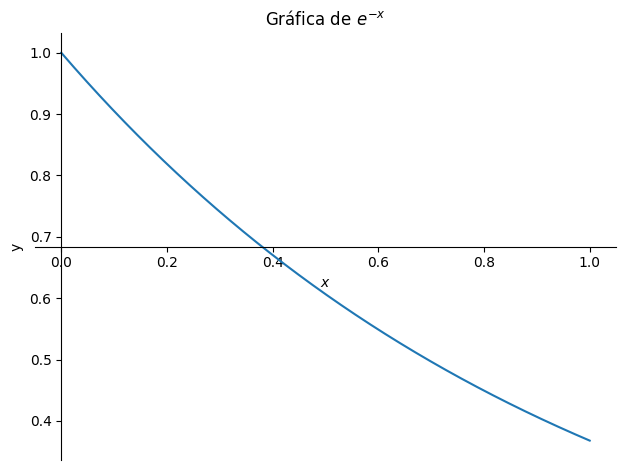

In [17]:
import sympy as sp
sp.init_printing()

x = sp.symbols('x')

u = sp.exp(-x)

display(u)

sp.plot(u, (x, 0, 1), title='Gráfica de $e^{-x}$', ylabel='y')


Importación de librerías

In [18]:
import sympy as sp  # Para cálculo simbólico
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para gráficos

Definición de variables y funciones base

In [20]:
x = sp.symbols('x', real=True)  # Define x como variable simbólica real
pi = sp.pi  # Constante π

u = sp.exp(-x)  # Función objetivo que queremos aproximar
h = sp.exp(2*x)  # Función de peso para el producto interno

Construcción de la serie de aproximación

In [21]:
sumatoria = 0  # Inicializa la sumatoria

for n in range(1, 100):  # Suma desde n=1 hasta n=99
    # Calcula parámetros para la función base
    k = 1 - (n * pi)**2
    omega = sp.sqrt(1 - k)

    # Define la función base f_n(x)
    f = sp.exp(-x) * sp.sin(omega * x)

    # Calcula el coeficiente de Fourier (producto interno <u,f> / <f,f>)
    integrando_1 = u * f * h  # <u,f> con peso h
    integral_1 = sp.integrate(integrando_1, (x, 0, 1))

    f_squared = f**2 * h  # <f,f> con peso h
    integral_2 = sp.integrate(f_squared, (x, 0, 1))

    division = integral_1 / integral_2  # Coeficiente c_n

    # Agrega el término a la sumatoria
    sumatoria += division * f

Conversión a función numérica

In [22]:
sumatoria_func = sp.lambdify(x, sumatoria, 'numpy')  # Convierte la expresión simbólica a función numérica

Evaluación y creación de la gráfica

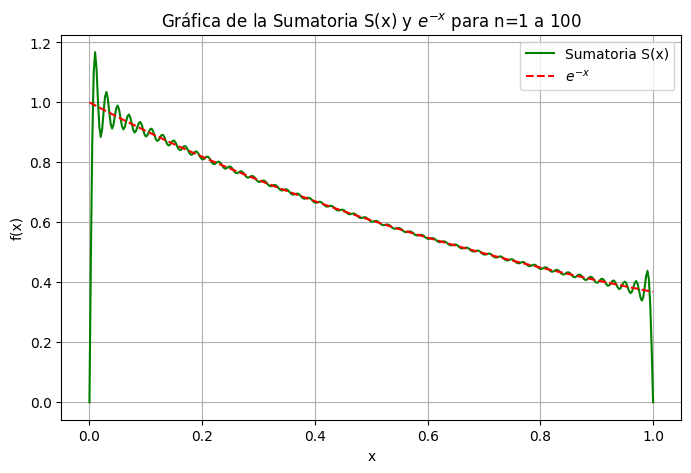

In [36]:
x_vals = np.linspace(0, 1, 400)  # Crea 400 puntos entre 0 y 1

# Evalúa la sumatoria y la función original en los puntos
y_vals_sumatoria = sumatoria_func(x_vals)
y_vals_exp = np.exp(-x_vals)

# Crea el gráfico comparativo
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals_sumatoria, label='Sumatoria S(x)', color='green')
plt.plot(x_vals, y_vals_exp, label='$e^{-x}$', color='red', linestyle='--')
plt.title('Gráfica de la Sumatoria S(x) y $e^{-x}$ para n=1 a 100')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()